# Car Auctions Analysis

You can write the explanation here

## Import libraries


In [124]:
# Import the libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy  as np

## Load the data frame

In [125]:
# Load the car sales data into a data frame.
ruta_archivo ='C:/Users/linco/OneDrive/Documents/Trabajo/vehiculos/data/car_prices.csv'
df = pd.read_csv(ruta_archivo, on_bad_lines='skip')

## Explaore the data

In [126]:

# Display the first few records of the data frame.
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [127]:
# Show the shape of the data frame.
df.shape

(558811, 16)

In [128]:
col = df.columns
print(col)

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')


In [129]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [130]:
df.nunique(axis=0)

year                34
make                96
model              973
trim              1975
body                86
transmission         2
vin             550296
state               38
condition           41
odometer        172277
color               20
interior            17
seller           14264
mmr               1101
sellingprice      1887
saledate          3745
dtype: int64

In [131]:
df.condition.unique()

array([5. , 4.5, 4.1, 4.3, 1. , 3.4, 2. , 4.2, 3. , 4.8, nan, 4.9, 1.7,
       1.9, 2.9, 3.8, 4.4, 4.7, 3.2, 4. , 2.5, 3.7, 3.9, 3.1, 2.8, 4.6,
       3.6, 3.5, 2.6, 2.1, 2.2, 2.7, 2.4, 3.3, 2.3, 1.5, 1.6, 1.8, 1.2,
       1.4, 1.1, 1.3])

In [132]:
df.tail()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
558806,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558810,2014,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et2eke87277,ca,3.4,15008.0,gray,gray,"ford motor credit company,llc pd",29600,26700,Thu May 28 2015 05:30:00 GMT-0700 (PDT)


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [134]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [135]:
# visualization in percentages
(df.isnull().sum()/(len(df)))*100

year             0.000000
make             1.843378
model            1.860915
trim             1.906011
body             2.361263
transmission    11.695010
vin              0.000000
state            0.000000
condition        2.110553
odometer         0.016821
color            0.134035
interior         0.134035
seller           0.000000
mmr              0.000000
sellingprice     0.000000
saledate         0.000000
dtype: float64

## Visualizacion de distribuccion de datos

In [136]:
plt.hist(df['year'])

TypeError: 'tuple' object is not callable

## cleaning of null values in it dataser

In [ ]:

df_cleaned = df.dropna(axis = 0)
df_cleaned.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
df_cleaned.shape

(472336, 16)

In [137]:
sns.displot( data= df_cleaned, x = 'sellingprice', kind= 'kde')

c:\Users\linco\anaconda3\envs\dhgoodall_python311_20231010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


TypeError: 'tuple' object is not callable

## correlation matrix

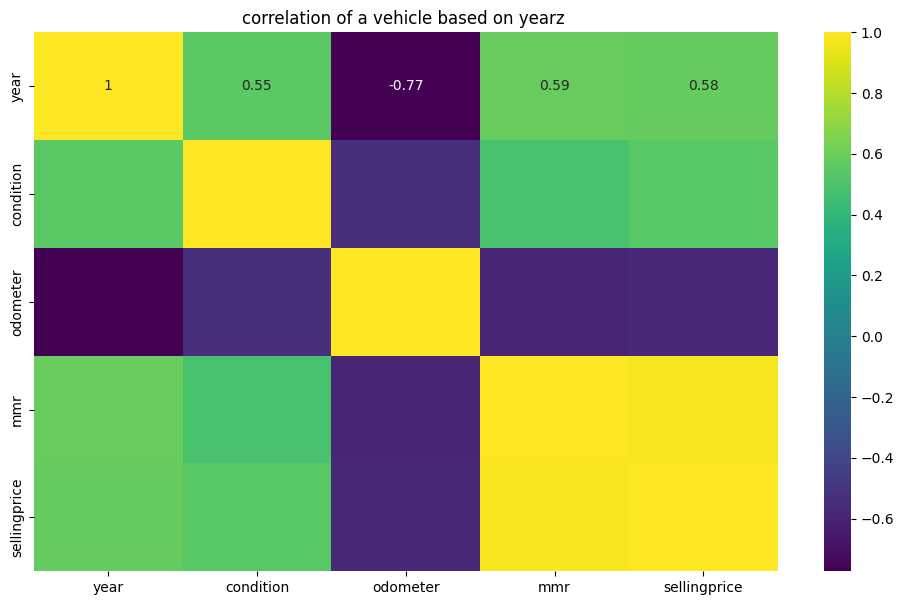

In [ ]:
correlation = df_cleaned[['year','condition','odometer','mmr','sellingprice']].corr()
plt.figure(figsize=(12,7))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels= correlation.columns, annot=True,cmap = 'viridis',cbar=True)
plt.title("correlation of a vehicle based on yearz ")
plt.show()

## scatter plot

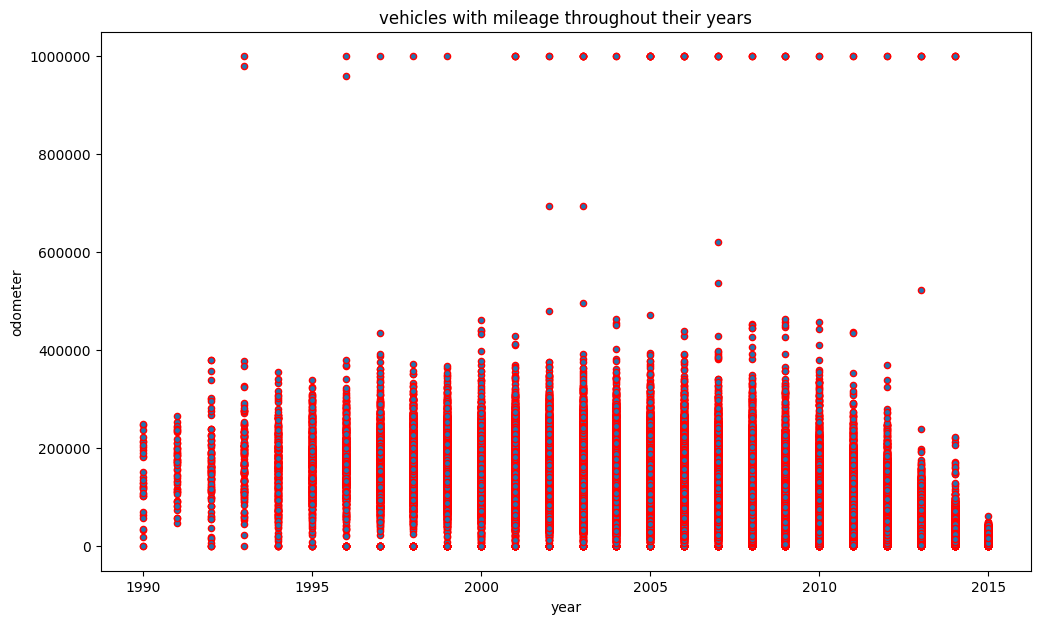

In [ ]:
df_cleaned.plot(x='year', y = 'odometer', kind = 'scatter', edgecolors = "red", figsize=(12,7))
plt.ticklabel_format(style='plain', axis='y')
plt.title("vehicles with mileage throughout their years")
plt.show()

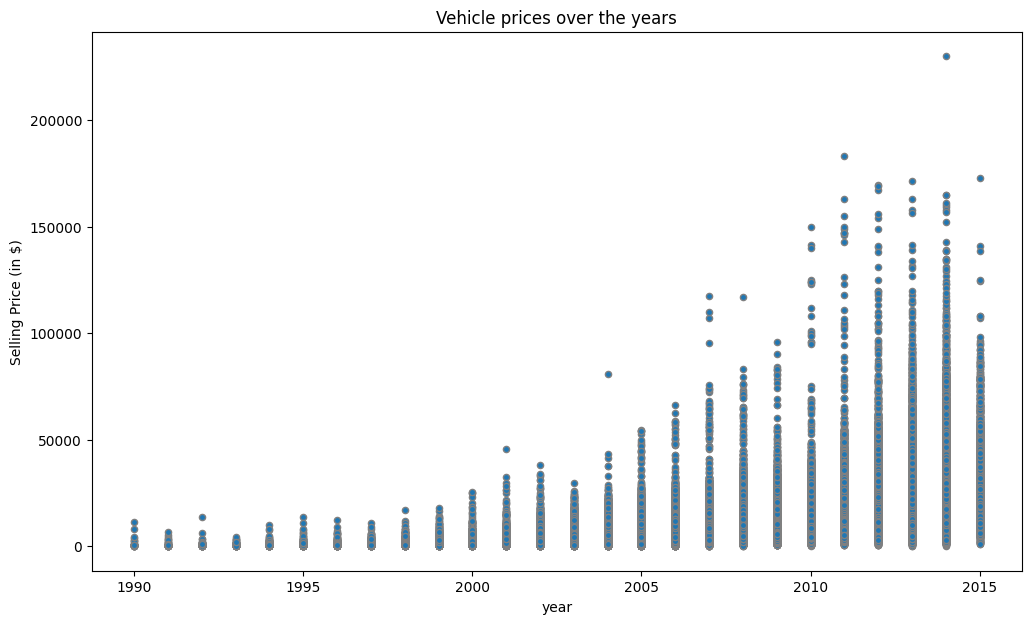

In [ ]:
df_cleaned.plot(x = 'year', y = 'sellingprice', kind = 'scatter',  edgecolors = "grey", figsize=(12,7))
plt.title("Vehicle prices over the years")
plt.xlabel('year')
plt.ylabel('Selling Price (in $)')
plt.show()

## all scatter plots

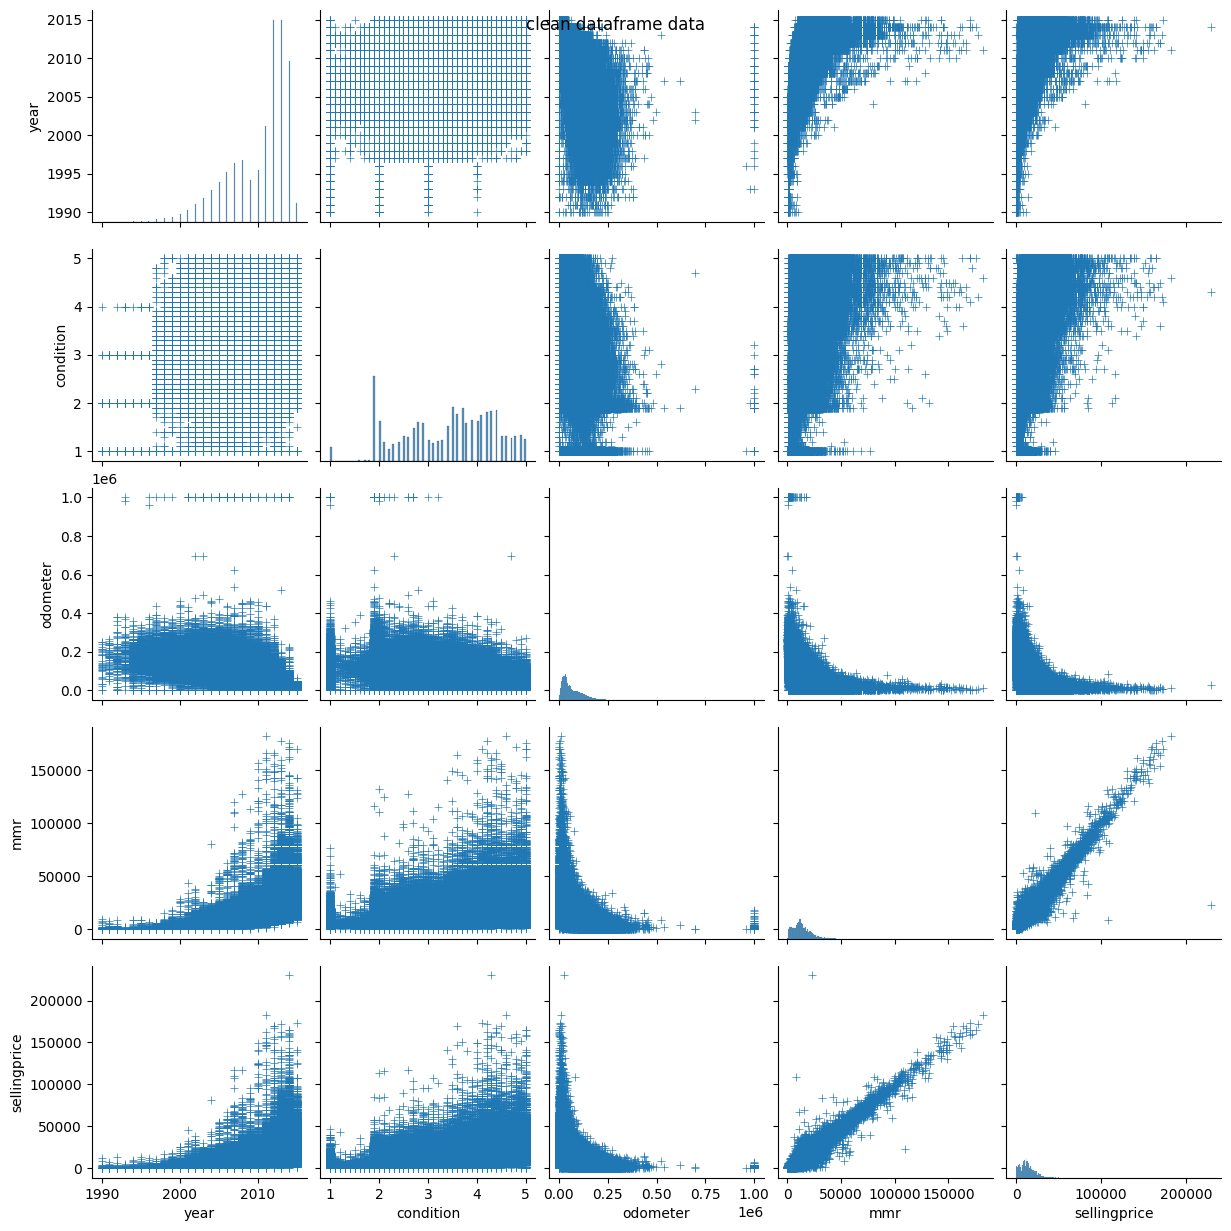

In [ ]:
sns.pairplot(df_cleaned, palette= 'husl', markers= '+')
plt.suptitle("clean dataframe data")
plt.show()

## histogram with clean databases

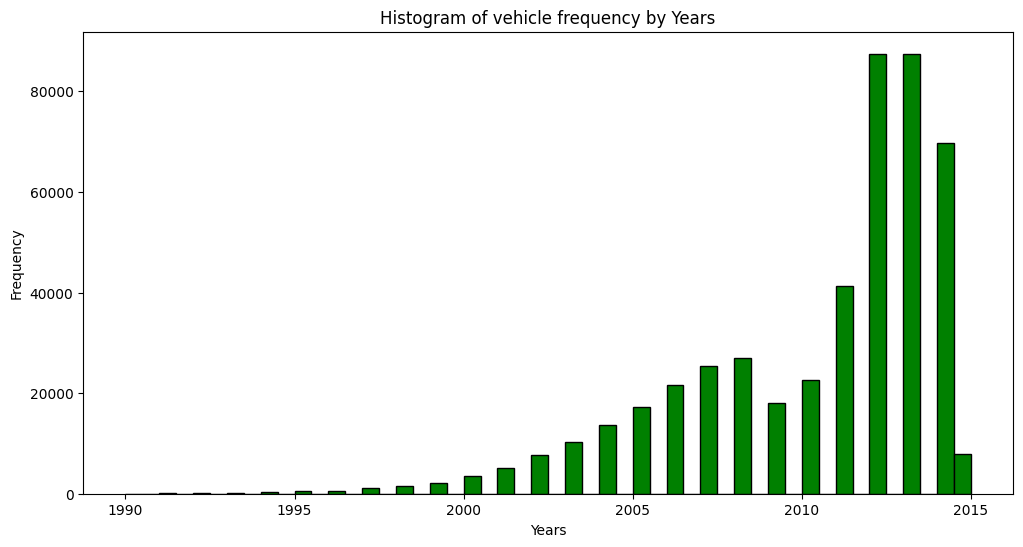

In [ ]:
df_cleaned['year'].plot(kind= 'hist', bins = 50, figsize=(12, 6),facecolor='green', edgecolor = 'black')
plt.title("Histogram of vehicle frequency by Years")
plt.xlabel('Years')
plt.show()

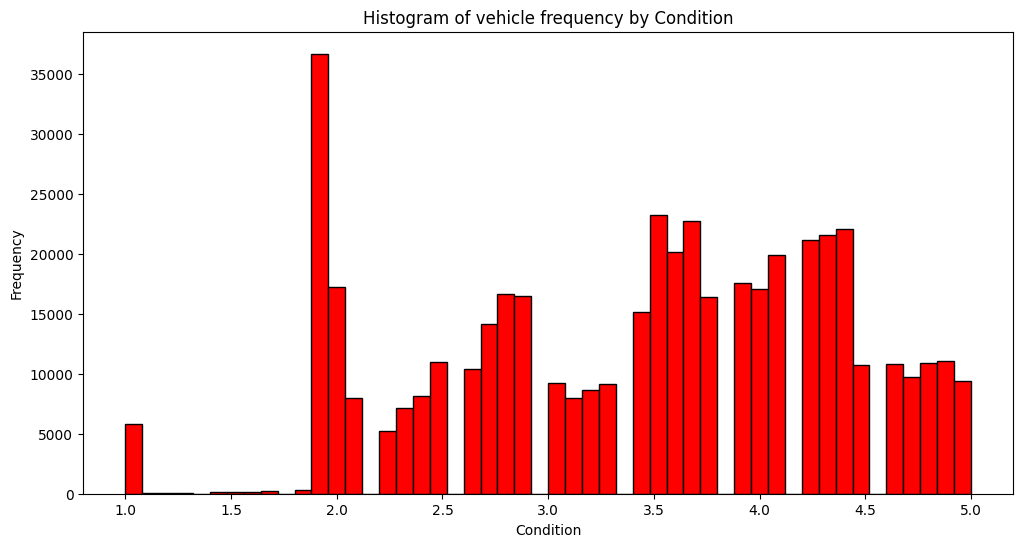

In [ ]:
df_cleaned['condition'].plot(kind= 'hist', bins = 50, figsize=(12, 6), facecolor='red', edgecolor = 'black')
plt.title("Histogram of vehicle frequency by Condition")
plt.xlabel('Condition')
plt.show()

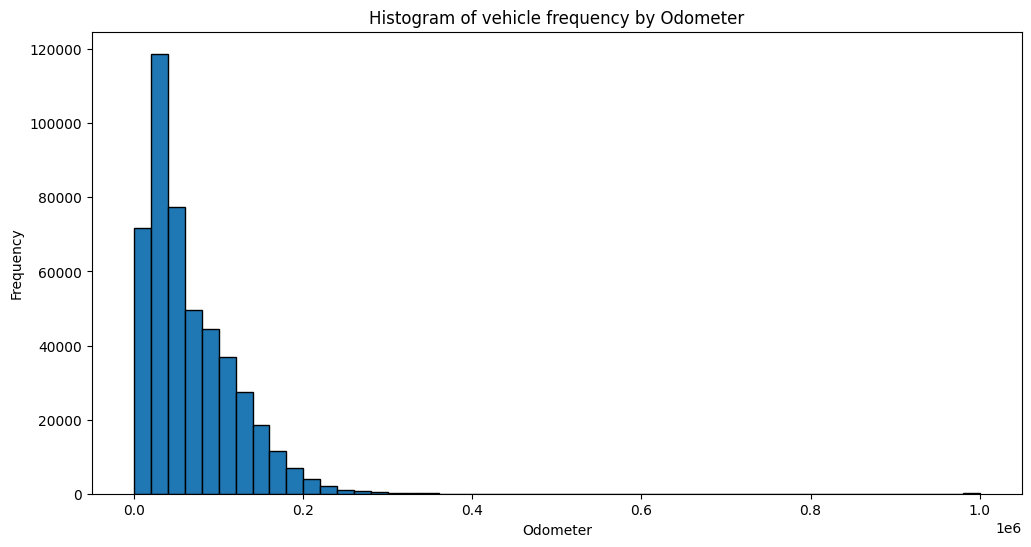

In [ ]:
df_cleaned['odometer'].plot(kind= 'hist', bins = 50, figsize=(12, 6), edgecolor = 'black')
plt.title("Histogram of vehicle frequency by Odometer")
plt.xlabel('Odometer')
plt.show()

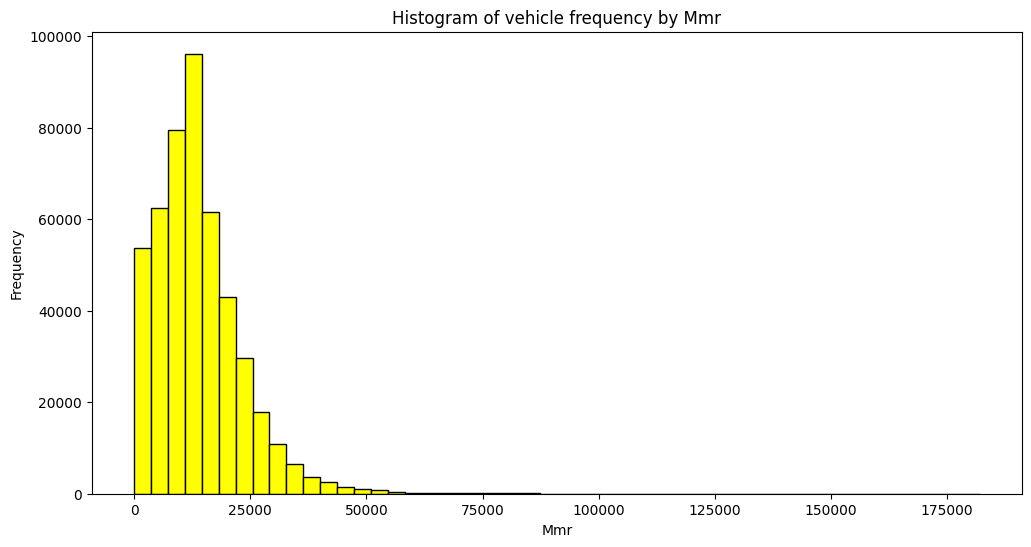

In [ ]:
df_cleaned['mmr'].plot(kind= 'hist', bins = 50, figsize=(12, 6), facecolor='yellow', edgecolor = 'black')
plt.title("Histogram of vehicle frequency by Mmr")
plt.xlabel('Mmr')
plt.show()

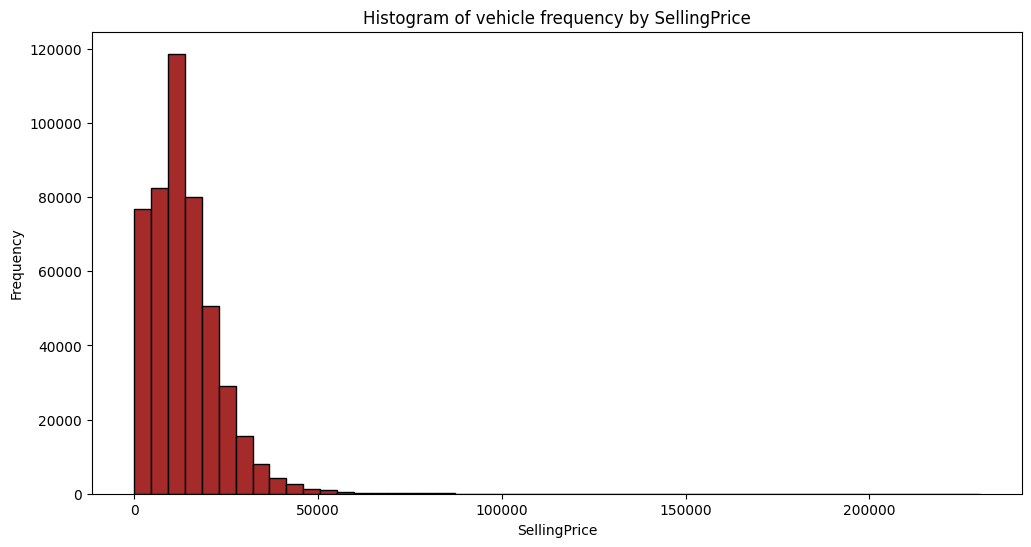

In [ ]:
df_cleaned['sellingprice'].plot(kind= 'hist', bins = 50, figsize=(12, 6), facecolor='brown', edgecolor = 'black')
plt.title("Histogram of vehicle frequency by SellingPrice")
plt.xlabel('SellingPrice')
plt.show()

## boxplot

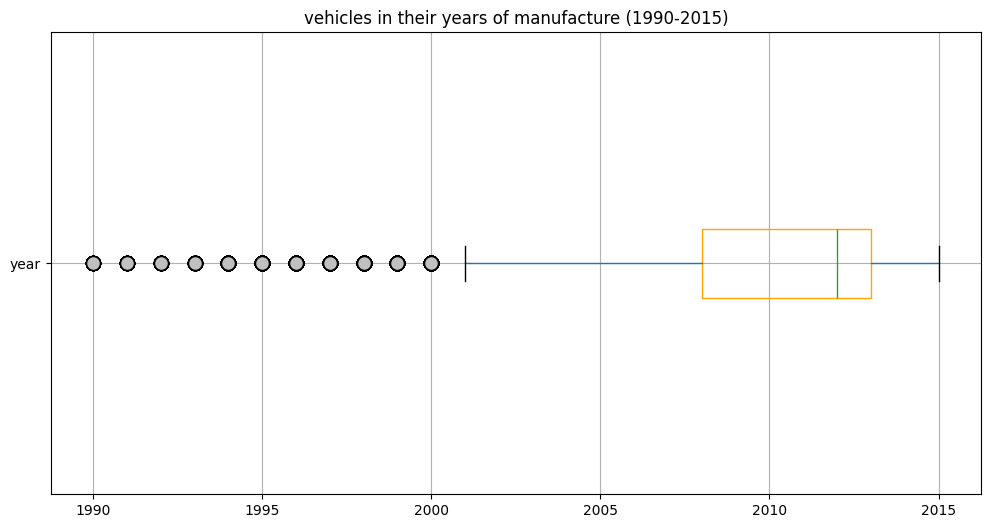

In [ ]:
df_cleaned.boxplot('year', vert = False, boxprops=dict(color='orange', linewidth=1), flierprops=dict(marker='o', markerfacecolor='silver', markersize=10), figsize=(12, 6))
plt.ticklabel_format(style='plain', axis='x')
plt.title('vehicles in their years of manufacture (1990-2015)')
plt.show()

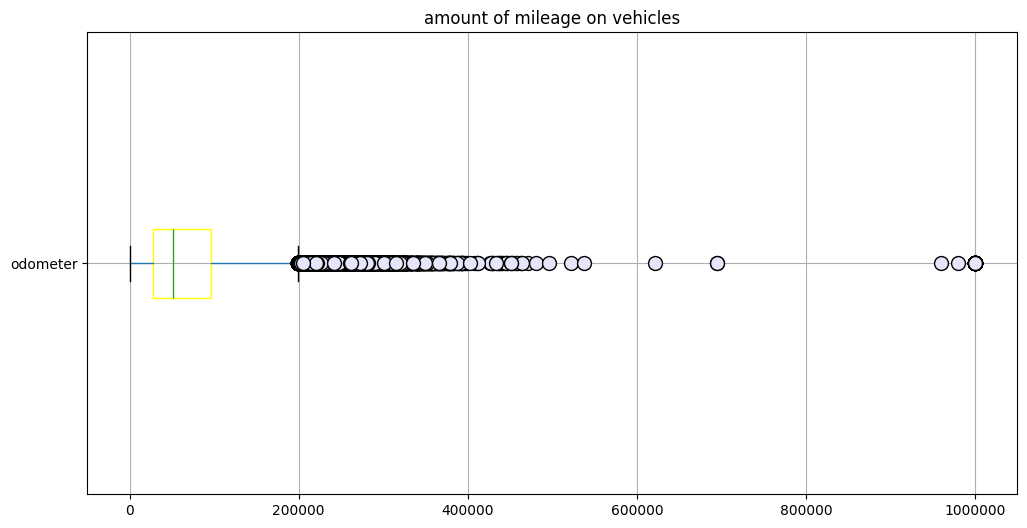

In [ ]:
df_cleaned.boxplot('odometer', vert = False, boxprops=dict(color='yellow', linewidth=1), flierprops=dict(marker='o', markerfacecolor='lavender', markersize=10), figsize=(12, 6))
plt.ticklabel_format(style='plain', axis='x')
plt.title('amount of mileage on vehicles')
plt.show()

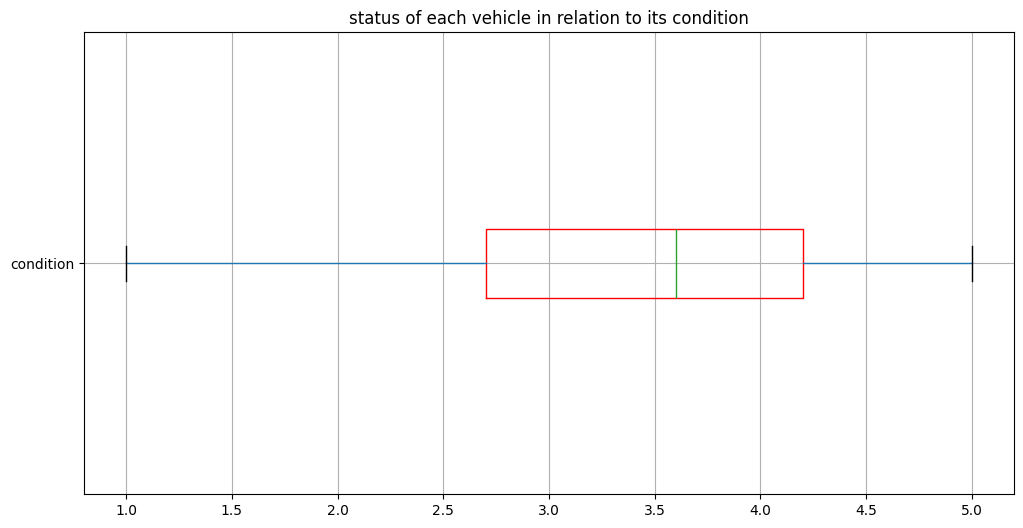

In [ ]:
df_cleaned.boxplot('condition', vert = False, boxprops=dict(color='red'), figsize=(12, 6))
plt.ticklabel_format(style='plain', axis='x')
plt.title('status of each vehicle in relation to its condition')
plt.show()

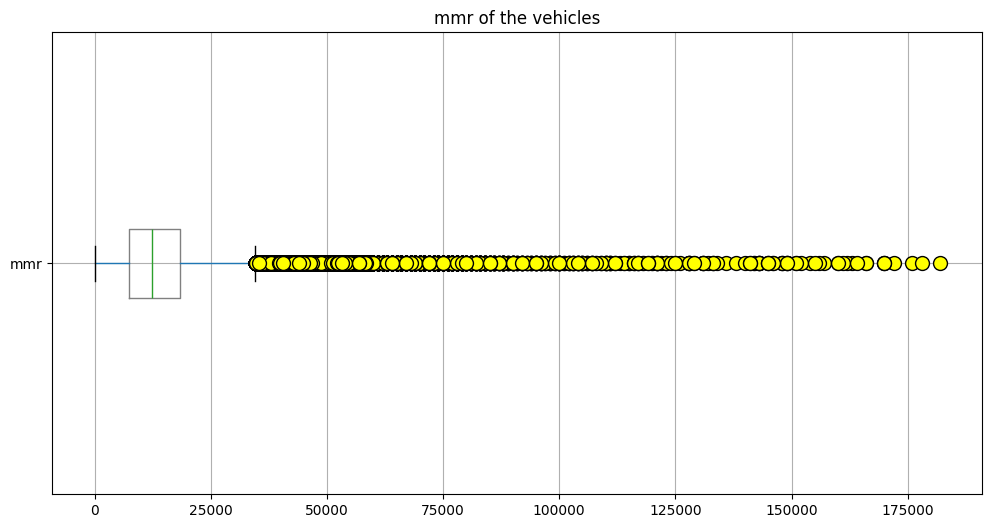

In [ ]:
df_cleaned.boxplot('mmr', vert = False, boxprops=dict(color='grey'), flierprops=dict(marker='o', markerfacecolor='yellow', markersize=10), figsize=(12, 6))
plt.ticklabel_format(style='plain', axis='x')
plt.title('mmr of the vehicles')
plt.show()

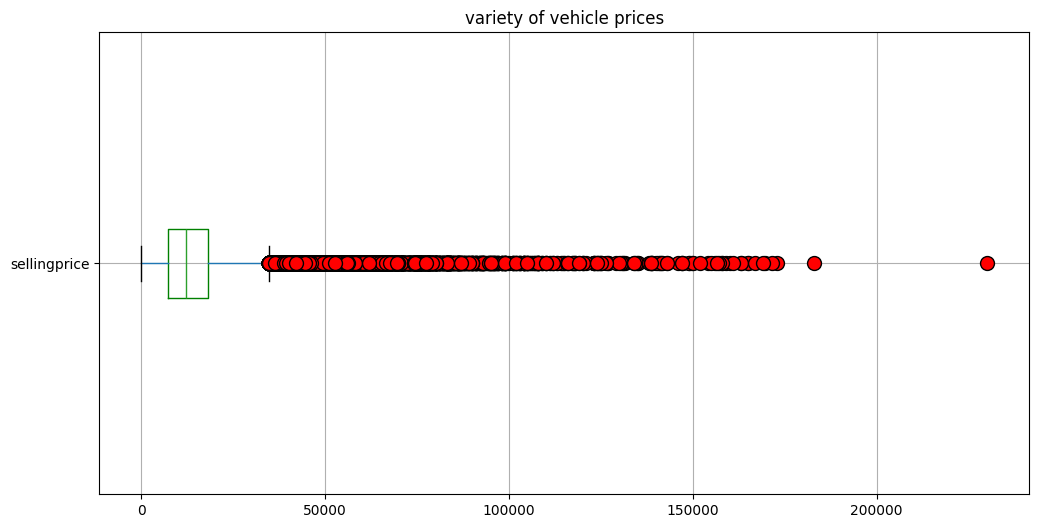

In [ ]:
df_cleaned.boxplot('sellingprice', vert = False, boxprops=dict(color='green', linewidth=1), flierprops=dict(marker='o', markerfacecolor='red', markersize=10), figsize=(12, 6))
plt.ticklabel_format(style='plain', axis='x')
plt.title('variety of vehicle prices')
plt.show()